#**Do fill in the details before you submit the file on BrightSpace. Rename the Colab file as well to your Name_Student No.ipynb**

---


##Name : Jack Tan
##Student ID : s10255823E
##Class : IPDS




---



#### The dataset contains meteorological data from the HI-SEAS Habitat in Hawaii. In particular the dataset includes observations of:

1.   Solar Irradiance (W/m2)
2.   Temperature (°F)
3.   Barometric Pressure (Hg)
4.   Humidity (%)
5.   Wind Direction (°)
6.   Wind Speed (mph)
7.   Sun Rise/Set Time

---

#### **Aim**
 To accurately model solar irradiance from other meteorological parameters contained within the dataset.

---



##**Question**

**What type of ML model are we training here?**


**Supervised/Unsupervised [Choose one]**


**Classification/Regression [Choose one]**



---


#**Environment preparation**
Import other relevant libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz


#**Read data file and prepare time series data**
1. Read in the relevant data file content into a Dataframe
2. Analyse and understand the data.
3. Set the index as datetime field and add more datetime related fields for machine learning.


In [ ]:
dataset = pd.read_csv('/content/SolarPrediction.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
print(dataset.shape)
dataset.head()

(32686, 11)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [ ]:
dataset.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [ ]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
dataset.isnull().sum()

,0
UNIXTime,0
Data,0
Time,0
Radiation,0
Temperature,0
Pressure,0
Humidity,0
WindDirection(Degrees),0
Speed,0
TimeSunRise,0


---
##**Question**

**Are there any null values in the dataset? If yes, what are the different ways to handle null values in time series data? Do a brief research and state atleast 3 different ways null values can be handles in time series data. You can use GEMINI or other tools for this question**

No, there are no null values in this dataset based on the output of dataset.isnull().sum().

Here are three ways to handle null values in time series data:

Imputation with previous or next value: Fill nulls with the last known value (forward fill) or the next known value (backward fill).
Imputation with mean, median, or mode: Replace nulls with the average, median, or most frequent value of the time series or a relevant subset.
Imputation with interpolation: Estimate null values based on surrounding data points using methods like linear interpolation or more advanced techniques.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32686 entries, 7416 to 24522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 4.0+ MB


In [ ]:
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)

In [ ]:
# Create more fields related to datetime for machine learning
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['Hour'] = dataset.index.hour
dataset['Month'] = dataset.index.month
dataset['Date'] = dataset.index.date

dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.time
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.time
dataset['Total_time'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.hour

In [ ]:
dataset.head(3)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Date,Total_time
UNIXTime,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12


In [ ]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Total_time
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,306.110965,43.871015,11.557425,10.526066,11.347886
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,34.781367,4.963061,6.912034,1.096691,0.476307
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,245.000000,35.000000,0.000000,9.000000,11.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,277.000000,40.000000,6.000000,10.000000,11.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,306.000000,44.000000,12.000000,11.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,334.000000,48.000000,18.000000,11.000000,12.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,366.000000,52.000000,23.000000,12.000000,12.000000


---
##**Question**

**Based on the output from the codes above, answer the following questions.**

 **Q1 :  How many rows of data are there?**

 **Q2 : Are there any null field in the dataset**

 **Q3 : Is the index a datetime column?**

---





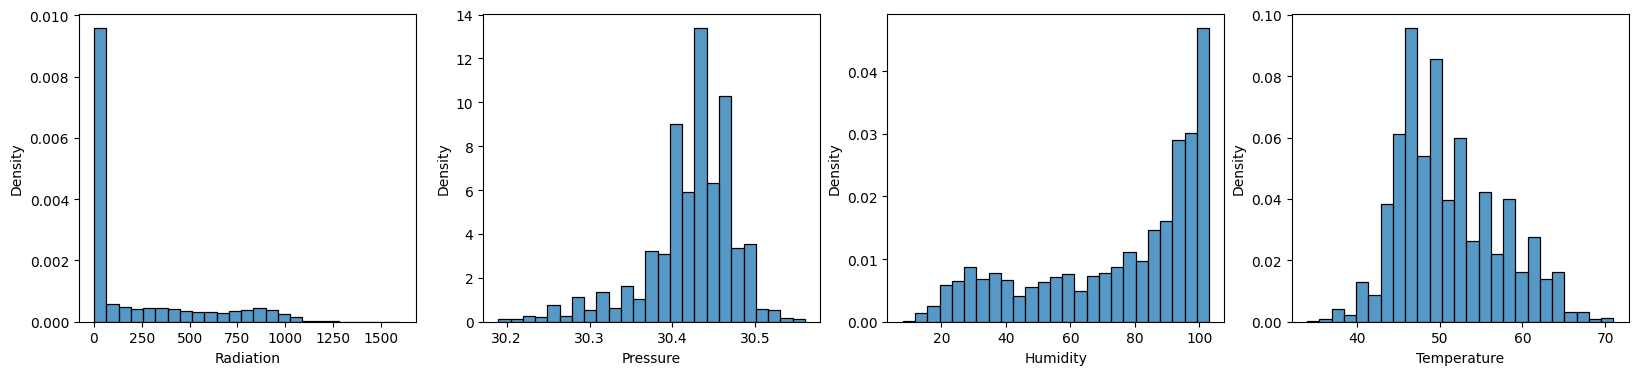

In [ ]:
# Distribution of Irradiance, Pressure, Humidity, Temperature
f, ax = plt.subplots(1,4,figsize=(20,4))
sns.histplot(dataset['Radiation'], stat="density", bins=25, ax=ax[0])
sns.histplot(dataset['Pressure'], stat="density", bins=25, ax=ax[1])
sns.histplot(dataset['Humidity'], stat="density", bins=25, ax=ax[2])
sns.histplot(dataset['Temperature'], stat="density", bins=25, ax=ax[3]);

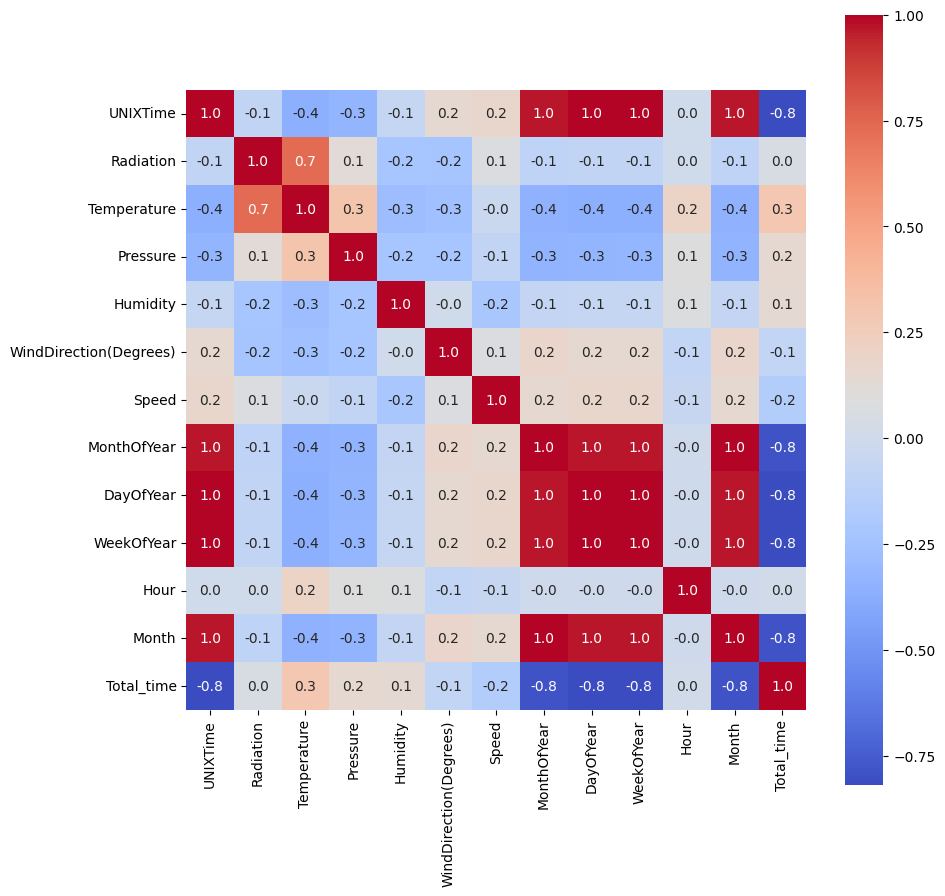

In [ ]:
corr = dataset.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet', 'Date'], axis=1).corr(method = "pearson")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".1f");

In [ ]:
dataset.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month',
       'Date', 'Total_time'],
      dtype='object')

---
#**Machine Learning**


---




In [ ]:
# Split the dataset into features and labels, X [features] and Y[label]
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
             'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Total_time']]

y = dataset['Radiation']

In [ ]:
# Train-test split using sklearn package
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##1.Linear Regression

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 40200.90321655357
mae = 150.566266245429
r2 = 0.6100029402001252


###**Question** : **Note down Linear Regression scores below**
mse = 40200.90321655357

mae = 150.566266245429

r2 = 0.6100029402001252

##2.Ridge Regression

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

model = Ridge(alpha = 0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 40201.30759096468
mae = 150.58387933711947
r2 = 0.6099990172825096


###**Question** : **Note down Ridge Regression scores below**
mse = 40201.30759096468

mae = 150.58387933711947

r2 = 0.6099990172825096

##3.K-Neighbours Regression

In [ ]:
#KNeighbours Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 28007.556706838786
mae = 91.78655919241358
r2 = 0.728293050805195


###**Question** : **Note down K-Neighbours Regression scores below**
mse = 28007.556706838786

mae = 91.78655919241358

r2 = 0.728293050805195

##4.Gradient Boosting Regression

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 24820.576034501035
mae = 99.46254317795116
r2 = 0.7592105922632923


###**Question** : **Note down Gradient Boosting Regression scores below**
mse = 24820.576034501035

mae = 99.46254317795116

r2 = 0.7592105922632923

##5.Decision Tree Regression

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 21777.393282982197
mae = 63.76527510961558
r2 = 0.7887331211262094


###**Question** : **Note down Decision Tree Regression scores below**
mse = 21777.393282982197

mae = 63.76527510961558

r2 = 0.7887331211262094

##6.Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 11227.513760946147
mae = 53.90163581835337
r2 = 0.8910796274391016


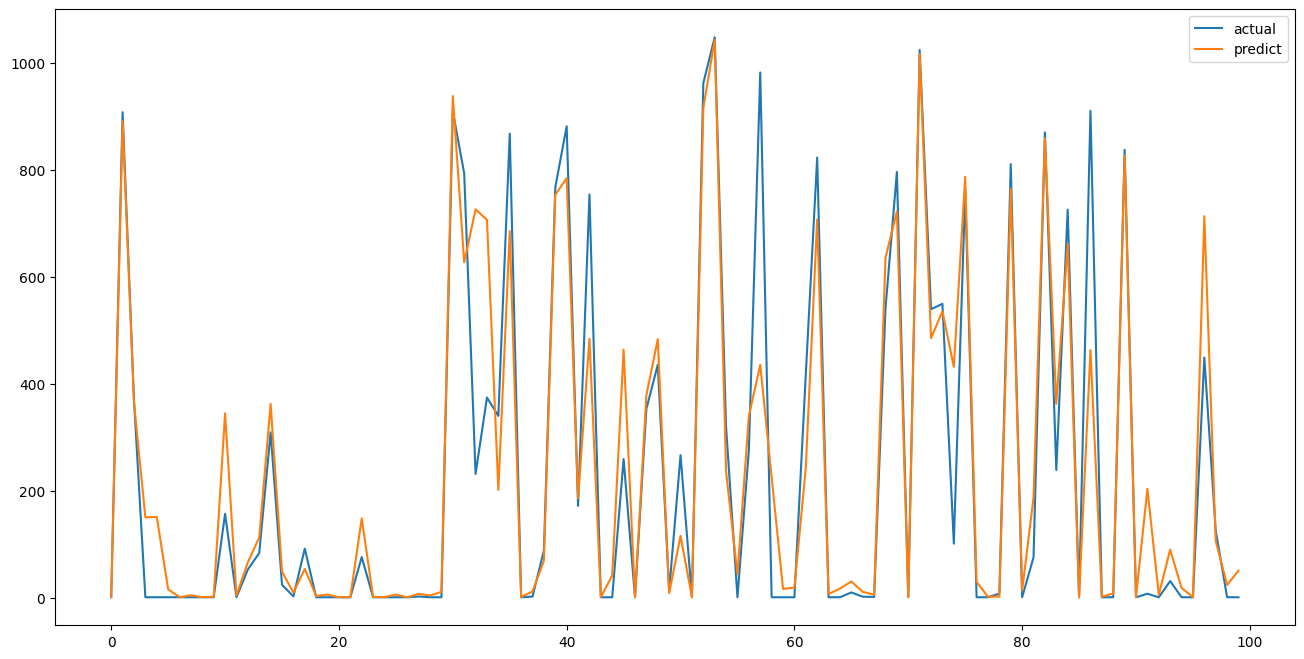

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

axis_x = [i for i in range(100)]
plt.figure(figsize=(16, 8))
plt.plot(axis_x, y_test[:100], label='actual')
plt.plot(axis_x, y_pred[:100], label='predict')
plt.legend()
plt.show()

###**Question** : **Note down Random Forest Regression scores below**
mse = 11227.513760946147

mae = 53.90163581835337

r2 = 0.8910796274391016

##7.Cross Validation & Model Selection
Let us try cross validating to ensure that these model is not overfitted.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

models=[("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("KNeighbors", KNeighborsRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor())]

all_data=[]
scoring = {'r2': 'r2',
           'mean_absolute_error': 'neg_mean_absolute_error',
           'mean_squared_error': 'neg_mean_squared_error'}

for name, model in models:
    results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    all_data.append({'model':name, 'score':results})
    print(f"{name}: {results['test_r2'].mean():.3f} , {results['test_mean_squared_error'].mean():.3f} , {results['test_mean_absolute_error'].mean():.3f}" )

Linear Regression: 0.600 , -39555.491 , -149.537
Ridge Regression: 0.600 , -39555.661 , -149.566
KNeighbors: 0.712 , -28496.140 , -92.579
Gradient Boosting: 0.748 , -24884.228 , -99.634
Decision Tree: 0.766 , -23120.549 , -66.218
Random Forest: 0.877 , -12188.071 , -56.159


In [ ]:
performance = {'model':[], 'r2':[], 'mse':[], 'mae':[]}

for d in all_data:
    performance['model'].append(d['model'])
    performance['r2'].append(np.abs(d['score']['test_r2'].mean())*100)
    performance['mse'].append(np.abs(d['score']['test_mean_squared_error'].mean()))
    performance['mae'].append(np.abs(d['score']['test_mean_absolute_error'].mean()))

print(performance)

{'model': ['Linear Regression', 'Ridge Regression', 'KNeighbors', 'Gradient Boosting', 'Decision Tree', 'Random Forest'], 'r2': [np.float64(59.97863723310116), np.float64(59.97844139001709), np.float64(71.19710606832773), np.float64(74.81490796869849), np.float64(76.60291295343093), np.float64(87.67154013615924)], 'mse': [np.float64(39555.49141900496), np.float64(39555.66111016508), np.float64(28496.139930495876), np.float64(24884.227810491688), np.float64(23120.54945415278), np.float64(12188.07086680922)], 'mae': [np.float64(149.53664634387198), np.float64(149.56553596659398), np.float64(92.57901940060947), np.float64(99.63433416515602), np.float64(66.21753841649344), np.float64(56.15886060421235)]}


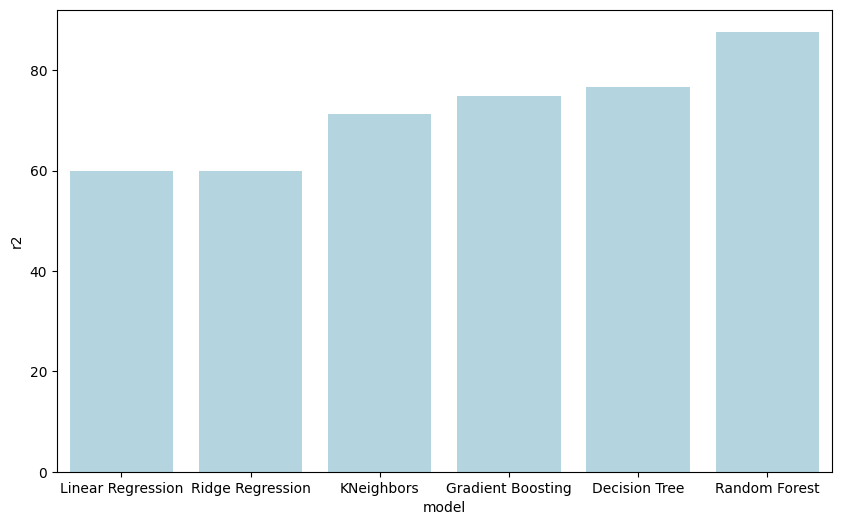

In [ ]:
# r2 score comparison across models
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='r2', data=performance, color="lightblue");

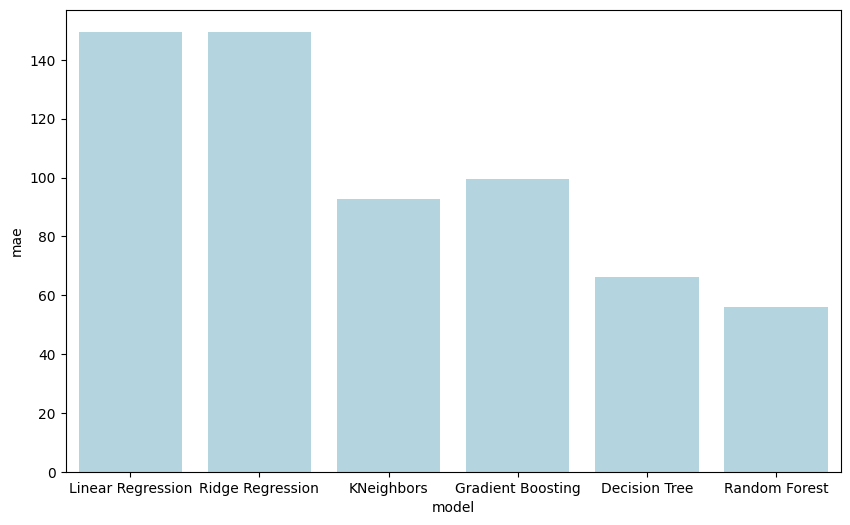

In [ ]:
# mae score comparison across models
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='mae', data=performance, color="lightblue");

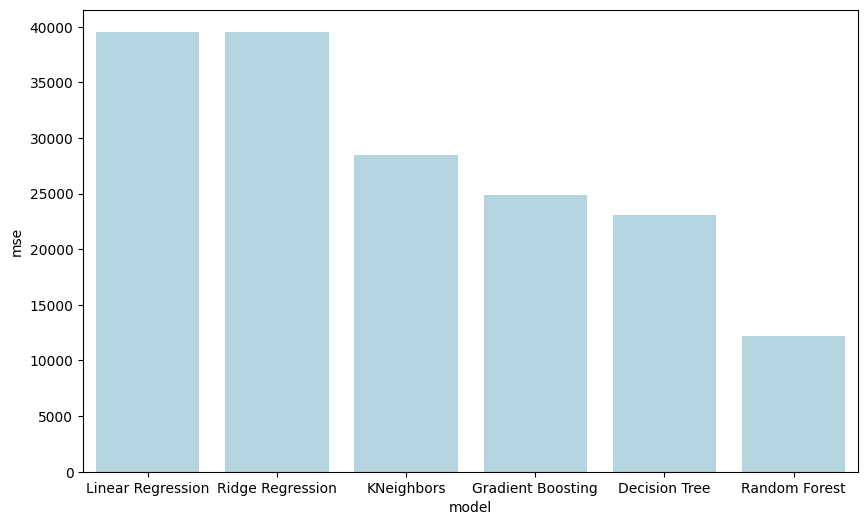

In [ ]:
# mse score comparison across models
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='mse', data=performance, color="lightblue");

###**Question** : **Which model performance is the best after cross validation?**
random forest



---
#**Neural Network**


---




In [ ]:
df = dataset.copy()

In [ ]:
df.head(2)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Date,Total_time
UNIXTime,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12


In [ ]:
df.drop(['Data','Time','WindDirection(Degrees)','Hour', 'Month','Date','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,Speed,MonthOfYear,DayOfYear,WeekOfYear,Total_time
UNIXTime,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,11.25,9,245,35,12
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,9.00,9,245,35,12
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,7.87,9,245,35,12
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,18.00,9,245,35,12
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,11.25,9,245,35,12


In [ ]:
#Split the dataset into train and test data
data = df.values

X = data[:,2:10]
Y = data[:,1]
Y = Y.reshape(-1,1)

print(X.shape)
print(Y.shape)
print(type(X))

(32686, 8)
(32686, 1)
<class 'numpy.ndarray'>


In [ ]:
#Scale the X and Y values to follow Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
#StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges,
#or simply when they are measured in different units of measure.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(26148, 8) (3269, 8) (3269, 8) (26148, 1) (3269, 1) (3269, 1)


###**Question** : **Determine the percentage of the following data of the main dataset**
Training data : 26148

Validation data : 6538

Test data : 3269

In [ ]:
# Simple Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,137 (324.75 KB)

 Trainable params: 83,137 (324.75 KB)

 Non-trainable params: 0 (0.00 B)

###**Question** : **How many hidden layers are in this neural network?**

The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters/weights are updated.
An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=10,
                validation_data=(X_val, Y_val))

Epoch 1/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3662 - mse: 0.3662 - val_loss: 0.2975 - val_mse: 0.2975
Epoch 2/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2529 - mse: 0.2529 - val_loss: 0.2455 - val_mse: 0.2455
Epoch 3/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2294 - mse: 0.2294 - val_loss: 0.2292 - val_mse: 0.2292
Epoch 4/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2123 - mse: 0.2123 - val_loss: 0.2331 - val_mse: 0.2331
Epoch 5/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2044 - mse: 0.2044 - val_loss: 0.2033 - val_mse: 0.2033
Epoch 6/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1954 - mse: 0.1954 - val_loss: 0.1974 - val_mse: 0.1974
Epoch 7/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1815 - mse: 0.1815 - val_loss: 0.1961 - val_mse: 0.1961
Epoch 8/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1821 - mse: 0.1821 - val_loss: 0.1872 - val_mse: 0.1872
Epoch 9/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - lo

In [ ]:
model.evaluate(X_test, Y_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2002 - mse: 0.2002


[0.20471036434173584, 0.20471036434173584]

In [ ]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[822.4633  ]
 [  7.013842]
 [ 17.449114]
 ...
 [ 10.674853]
 [ 26.78406 ]
 [805.17883 ]]
[[1153.38]
 [  88.38]
 [  22.06]
 ...
 [   1.21]
 [   1.21]
 [1013.88]]


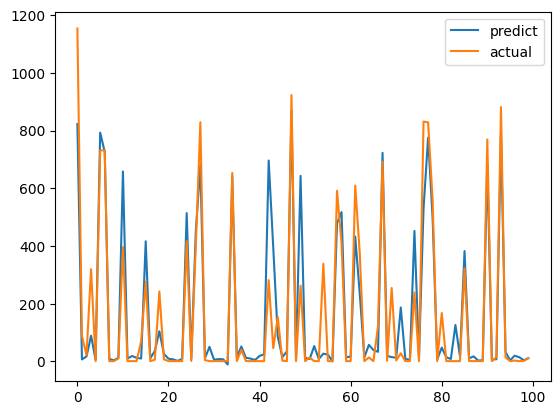

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

axis_x = [i for i in range(100)]

plt.plot(axis_x, Y_result[:100], label='predict')
plt.plot(axis_x, Y_test_unscaled[:100], label='actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.7949727657661478
mse = 20430.116298933193
r2 = 0.7947566864943052


###**Question** : **Change the values of batch and epoch to observe the change in model performance. I.e copy and paste the code on model.compile and tweak the epoch values keeping batch as constant. Then tweak the batch values, keeping epoch value as constant. Identify ONE combination of batch values (32, 64, 128) and epoch values that gives better model performance in terms of r2 score**
Batch value :

5 = 0.82634560567967436

10 = 0.8574012917463423

15 = 0.8668924997536652

Epoch value :

32 = 0.8574012917463423

64 = 0.8599651576277074

128 = 0.8665920297872002

r2 value = 0.8668924997536652

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train,
                batch_size=128, epochs=10,
                validation_data=(X_val, Y_val))

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.1150 - val_mse: 0.1150
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.1199 - val_mse: 0.1199
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0495 - mse: 0.0495 - val_loss: 0.1197 - val_mse: 0.1197
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.1163 - val_mse: 0.1163
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.1143 - val_mse: 0.1143
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.1211 - val_mse: 0.1211
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 9/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - l

In [ ]:
model.evaluate(X_test, Y_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1278 - mse: 0.1278


[0.13306160271167755, 0.13306160271167755]

In [ ]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 9.4532123e+02]
 [ 3.3187129e+00]
 [-2.1426060e+00]
 ...
 [-3.7069443e-01]
 [ 1.3585467e+01]
 [ 1.0386526e+03]]
[[1153.38]
 [  88.38]
 [  22.06]
 ...
 [   1.21]
 [   1.21]
 [1013.88]]


In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.8667173330951451
mse = 13279.557321980637
r2 = 0.8665920297872002


###**Question** : **Add one more Dense layer and observe the change in model performance**

new r2 score : 0.7804600272341342

In [ ]:
# Simple Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))



In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=10,
                validation_data=(X_val, Y_val))

Epoch 1/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3547 - mse: 0.3547 - val_loss: 0.3019 - val_mse: 0.3019
Epoch 2/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2539 - mse: 0.2539 - val_loss: 0.2519 - val_mse: 0.2519
Epoch 3/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2286 - mse: 0.2286 - val_loss: 0.2259 - val_mse: 0.2259
Epoch 4/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2180 - mse: 0.2180 - val_loss: 0.2244 - val_mse: 0.2244
Epoch 5/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2107 - mse: 0.2107 - val_loss: 0.2284 - val_mse: 0.2284
Epoch 6/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2004 - mse: 0.2004 - val_loss: 0.2094 - val_mse: 0.2094
Epoch 7/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1966 - mse: 0.1966 - val_loss: 0.2041 - val_mse: 0.2041
Epoch 8/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1857 - mse: 0.1857 - val_loss: 0.1989 - val_mse: 0.1989
Epoch 9/10
818/818 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lo

In [ ]:
model.evaluate(X_test, Y_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2182 - mse: 0.2182


[0.21896992623806, 0.21896992623806]

In [ ]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[778.342    ]
 [ 45.33521  ]
 [  2.5753047]
 ...
 [  1.4916103]
 [ 50.30115  ]
 [889.25946  ]]
[[1153.38]
 [  88.38]
 [  22.06]
 ...
 [   1.21]
 [   1.21]
 [1013.88]]


In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.7833744159924417
mse = 21853.219475268386
r2 = 0.7804600272341342


##**Question**

###Find out what feature engineering is briefly and determine whether you applied feature engineering in this colab file.

Feature engineering is the process of creating new features from existing data to improve the performance of machine learning models.

Yes, feature engineering was applied in this Colab file in the following cell:

In this cell, new features such as 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month', 'Date', and 'Total_time' were created from the existing 'UNIXTime', 'TimeSunRise', and 'TimeSunSet' columns. This is a form of feature engineering as you are creating new, potentially more informative features for your model.